In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import math
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [ ]:
no = "100"
# example_filename = os.path.join(data_path, 'example4d.nii.gz')
img = nib.load('D:/projects/finalProject/nifti/' + no + '/image.nii.gz')
img2 = nib.load('D:/projects/finalProject/nifti/' + no + '/mask.nii.gz')
xn = img.shape[0]
yn = img.shape[1]
zn = img.shape[2]
d = img.get_data()
d2 = img2.get_data()

In [ ]:
n = 0
for z in range(zn):
    data = [ ]
    for y in range(yn):
        dy = [ ]
        for x in range(xn):
            dy.append(d[x][y][z])
        data.append(dy)
    plt.imshow(data)
    plt.show()

In [ ]:
s = 100

In [ ]:
import time
def getImg(z, y0 = 0, y1 = yn, x0 = 0, x1 = xn, dataConstant = True, vLow = 120, vHigh = 2000, ds = d, minValue = -2000, maxValue = 0):
    data = [ ]
    for y in range(y0, y1):
        dy = [ ]
        for x in range(x0, x1):
            if ds[x][y][z] > vLow and ds[x][y][z] < vHigh:
                if dataConstant:
                    dy.append(maxValue)
                else:
                    dy.append(ds[x][y][z])
            else:
                dy.append(minValue)
        data.append(dy)
    return data
def getNeighbour(img, arr, x, y):
    c = 0
    for ty in range(-1, 2):
        for tx in range(-1, 2):
            if x + tx >= 0 and y + ty >= 0 and x + tx < xn and y + ty < yn and img[y + ty][x + tx] == 0:
                arr.append((x + tx, y + ty))
                c = c + 1
    return c
def markImg(img, x, y):
    arr = [(x, y)]
    bound = [float("-inf"), float("-inf"), float("inf"), float("inf")]
    c = 1
    while len(arr) > 0:
        # time.sleep(0.1)
        f = arr.pop()
        if f[0] > bound[1]:
            bound[1] = f[0]
        if f[0] < bound[3]:
            bound[3] = f[0]
        if f[1] > bound[0]:
            bound[0] = f[1]
        if f[1] < bound[2]:
            bound[2] = f[1]
        # arr = arr[1 : ]
        img[f[1]][f[0]] = 4000
        c = c + getNeighbour(img, arr, f[0], f[1])
        # if c > 2000:
    # if bound[0] - bound[2] > 10 and bound[1] - bound[3] > 10:
    #     plt.imshow(img)
    #     plt.show()
        # print(x, y)
        # print("h: {}, w: {}".format(bound[0] - bound[2], bound[1] - bound[3]))
    return { "h": bound[0] - bound[2], "w": bound[1] - bound[3], "t": bound[0], "r": bound[1], "b": bound[2], "l": bound[3], "d": c }
        # print(len(arr))
        # else:
            # c = c + 1

def numObj(img, pr = False, h = 20, w = 20):
    data = [ ]
    ret = [ ]
    for y in range(yn):
        dy = [ ]
        for x in range(xn):
            if img[y][x] == 0:
                dy.append(img[y][x])
                # print(x, y)
                bound = markImg(img, x, y)
                if bound["h"] > h and bound["w"] > w:
                    if pr:
                        plt.imshow(img)
                        plt.show()
                        print(bound)
                    ret.append(bound)
                # print("h: {}, w: {}".format(bound[0] - bound[2], bound[1] - bound[3]))
            else:
                dy.append(-2000)
        data.append(dy)
    # plt.imshow(data)
    # plt.show()
    return ret
# getImg(0)
# start 70
# numObj(getImg(88))
# print(s)
# s = s + 1

def getRight(r, bounds):
    maxBound = bounds[0]
    for bound in bounds:
        if maxBound["r"] < bound["r"]:
            maxBound = bound
    if r > maxBound["l"]:
        return maxBound["l"]
    else:
        return r

def getBottom(b, bounds, z):
    if b == -1 and len(bounds) > 4:
        return z
    return b

def getTop(b, t, bounds, z):
    if b > -1 and t >= zn and len(bounds) < 2:
        return z
    return t
def getBottomY(bounds):
    maxBound = bounds[0]
    for bound in bounds:
        if maxBound["t"] < bound["t"]:
            maxBound = bound
    return maxBound["b"]
def getLargeFrame(bounds, data, z):
    d = data["tD"]
    if len(bounds) > 2:
        rB = 0
        lB = 0
        for i in range(len(bounds)):
            if bounds[rB]["r"] < bounds[i]["r"]:
                rB = i
            if bounds[lB]["l"] > bounds[i]["l"]:
                lB = i
        mr = math.floor((bounds[rB]["t"] + bounds[rB]["b"]) / 2)
        ml = math.floor((bounds[lB]["t"] + bounds[lB]["b"]) / 2)
        m = mr if mr < ml else ml
        tBs = [i for i in range(len(bounds)) if i != rB and i != lB]
        tB = tBs[0]
        for i in tBs:
            if bounds[tB]["t"] > bounds[i]["t"]:
                tB = i
        if bounds[tB]["t"] > m:
            if d < bounds[tB]["d"]:
                return { "tO": tB, "rO": rB, "lO": lB, "tD": bounds[tB]["d"], "z": z }
    return data

In [ ]:
bounds = numObj(getImg(88))
getLargeFrame(bounds, { "tD": -1, "z": -1 }, 2)
# bounds

{'tO': 0, 'rO': 1, 'lO': 2, 'tD': 19492, 'z': 2}

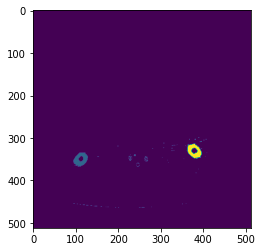

{'h': 34, 'w': 32, 't': 348, 'r': 395, 'b': 314, 'l': 363, 'd': 2534}


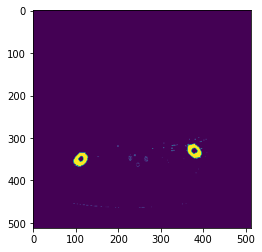

{'h': 32, 'w': 33, 't': 367, 'r': 128, 'b': 335, 'l': 95, 'd': 2523}


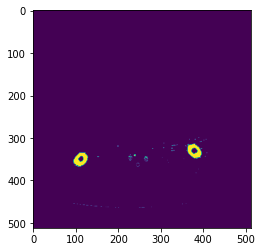

{'h': 5, 'w': 8, 't': 349, 'r': 269, 'b': 344, 'l': 261, 'd': 32}


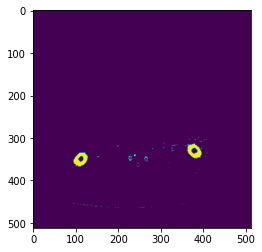

{'h': 7, 'w': 7, 't': 353, 'r': 232, 'b': 346, 'l': 225, 'd': 33}


363

In [ ]:
# 94 88
bounds = numObj(getImg(49), True, 4, 4)
getRight(float("inf"), bounds)
# numObj(getImg(94))

In [ ]:
r = float("inf")
b = -1
t = zn
largeData = { "tD": -1, "z": -1 }
for z in range(0, zn):
    bounds = numObj(getImg(z))
    if len(bounds) > 2:
        r = getRight(r, bounds)
    b = getBottom(b, bounds, z)
    t = getTop(b, t, bounds, z)
    largeData = getLargeFrame(bounds, largeData, z)
    arr = [ ]
    for bo in bounds:
        arr.append(bo["d"])
    print(z, len(bounds), arr)
print("bounds: ", t, b, largeData)

0 2 [1971, 2068]
1 2 [2004, 2110]
2 2 [2027, 2071]
3 2 [2020, 2079]
4 2 [2024, 2127]
5 2 [2053, 2144]
6 2 [2053, 2096]
7 2 [2079, 2101]
8 2 [2132, 2037]
9 2 [2155, 2068]
10 2 [2147, 2084]
11 2 [2204, 2034]
12 2 [2197, 2084]
13 2 [2187, 2117]
14 2 [2228, 2082]
15 3 [2377, 2049, 1010]
16 3 [2425, 2142, 880]
17 2 [2671, 2126]
18 3 [2497, 2164, 611]
19 3 [2445, 2218, 641]
20 3 [2506, 2146, 586]
21 3 [2440, 2161, 247]
22 2 [2478, 2262]
23 2 [2619, 2266]
24 2 [2557, 2311]
25 2 [2445, 2354]
26 2 [2450, 2291]
27 2 [2463, 2348]
28 2 [2478, 2347]
29 2 [2462, 2307]
30 2 [2484, 2316]
31 2 [2480, 2305]
32 2 [2570, 2329]
33 2 [2604, 2328]
34 3 [2716, 459, 2389]
35 3 [2796, 2411, 385]
36 2 [2874, 2500]
37 2 [2748, 2639]
38 3 [2641, 1009, 2568]
39 2 [2628, 2425]
40 2 [2608, 2461]
41 2 [2576, 2439]
42 2 [2569, 2472]
43 2 [2537, 2507]
44 2 [2598, 2504]
45 2 [2584, 2541]
46 2 [2542, 2554]
47 2 [2562, 2541]
48 2 [2563, 2525]
49 2 [2534, 2523]
50 2 [2558, 2542]
51 2 [2511, 2536]
52 2 [2495, 2598]
53 2 [254

In [ ]:
y0 = numObj(getImg(largeData["z"]))[largeData["tO"]]["b"] - 10
x1 = numObj(getImg(largeData["z"]))[largeData["tO"]]["r"]
y1 = getBottomY(numObj(getImg(largeData["z"]), False, 6, 6))
x0 = numObj(getImg(largeData["z"]))[largeData["tO"]]["l"]
imgBound = { "y0": y0, "x1": x1, "y1": y1, "x0": x0, "t": t, "b": b }
imgBound

{'y0': 252, 'x1': 304, 'y1': 424, 'x0': 201, 't': 105, 'b': 71}

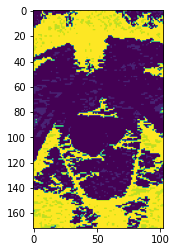

0


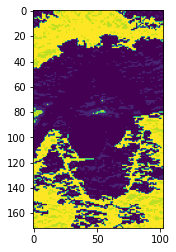

1


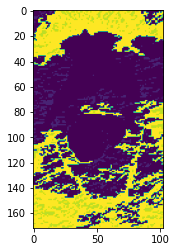

2


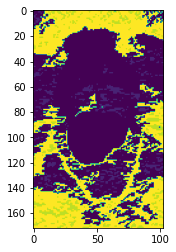

3


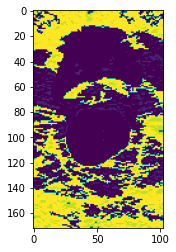

4


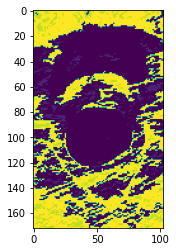

5


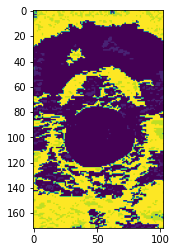

6


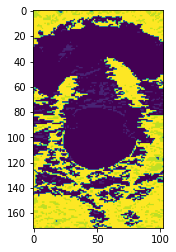

7


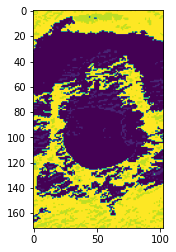

8


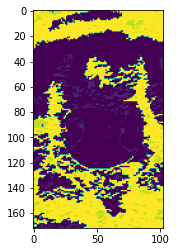

9


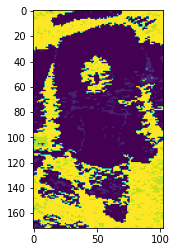

10


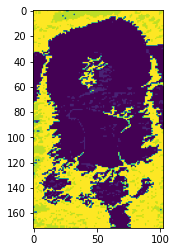

11


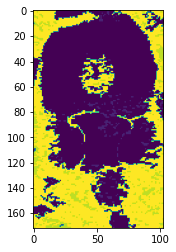

12


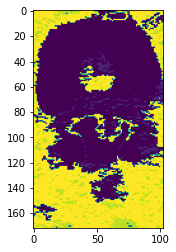

13


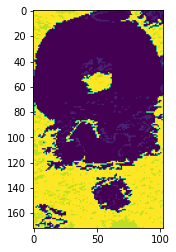

14


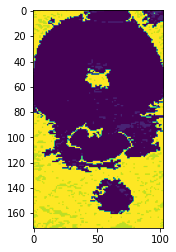

15


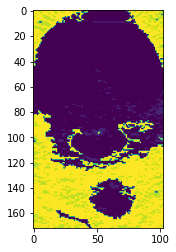

16


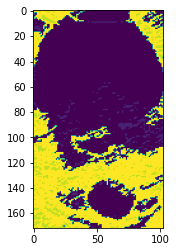

17


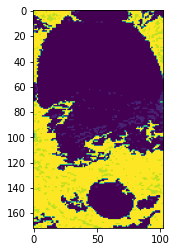

18


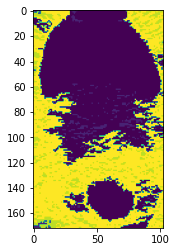

19


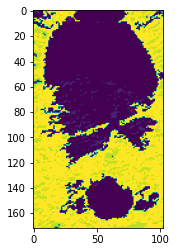

20


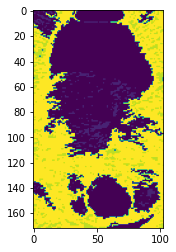

21


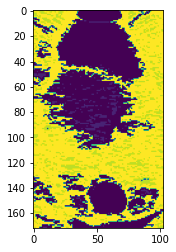

22


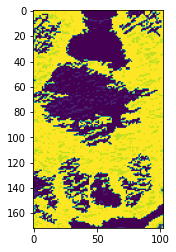

23


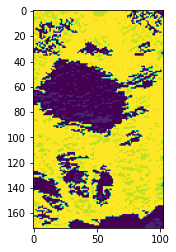

24


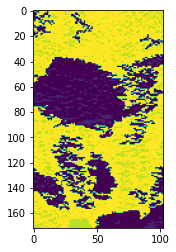

25


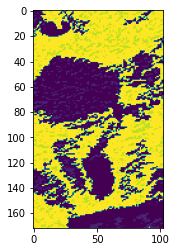

26


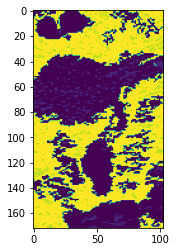

27


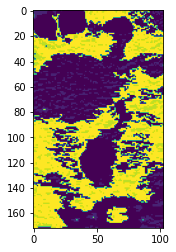

28


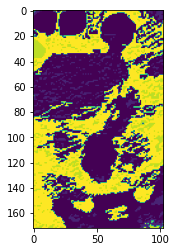

29


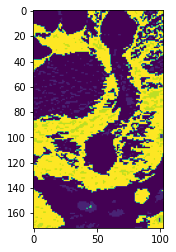

30


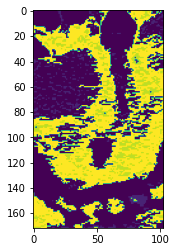

31


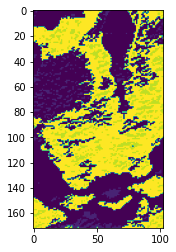

32


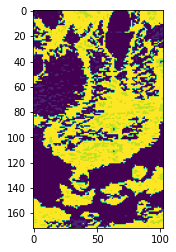

33


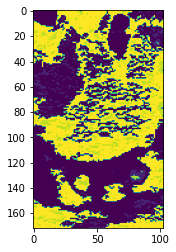

34


In [ ]:
# countore regions
# -1.8, 140
# -93 26
cPrint = 0
for z in range(b, t + 1):
    # removeSmall(imgBound["b"] + 3, imgBound)
    plt.imshow(removeSmall(z, imgBound))
    # plt.imshow(getImg(z, imgBound["y0"], imgBound["y1"], imgBound["x0"], imgBound["x1"], False, -93, 26))
    plt.show()
    print(cPrint)
    cPrint = cPrint + 1

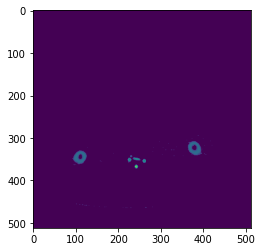

40


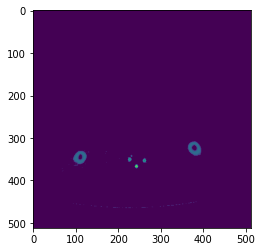

41


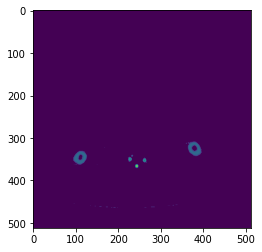

42


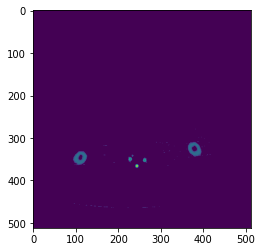

43


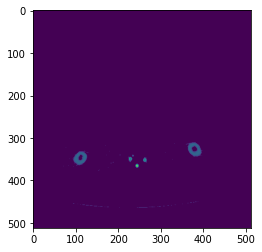

44


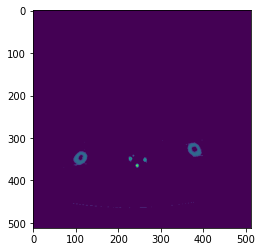

45


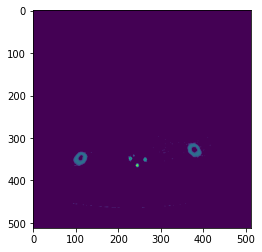

46


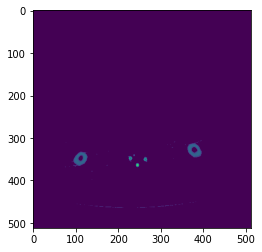

47


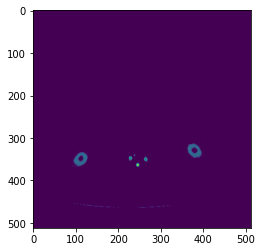

48


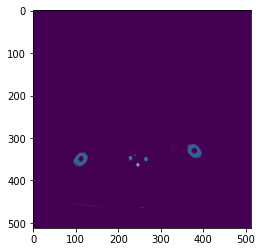

49


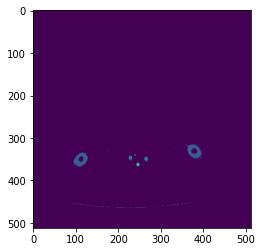

50


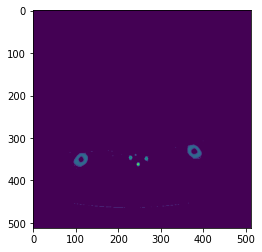

51


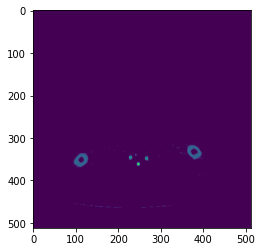

52


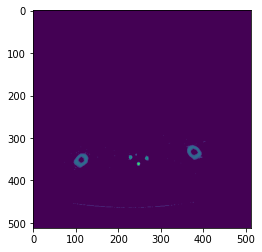

53


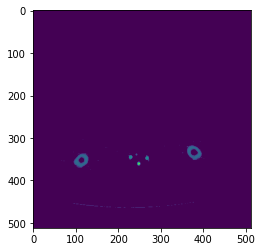

54


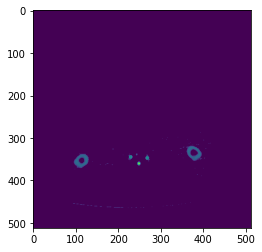

55


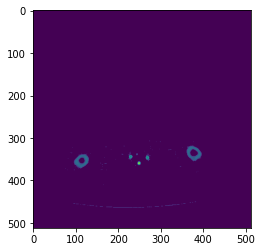

56


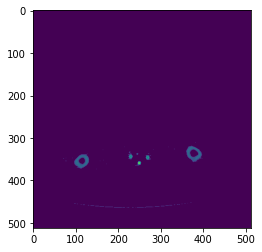

57


In [ ]:
z = 0
for z in range(40, 58):
    data = [ ]
    for y in range(yn):
        dy = [ ]
        for x in range(xn):
            if d[x][y][z] > 120:
                dy.append(d[x][y][z])
            else:
                dy.append(-2000)
        data.append(dy)
    plt.imshow(data)
    plt.show()
    print(z)

In [ ]:
T = [1, 2, 3, 4, 5, 6, 7, 8]
T = T[1 : ]
def test(U):
    U[1] = 9
test(T)
print(T.pop())
T

8


[2, 9, 4, 5, 6, 7]

contour

In [ ]:
def removeSmall(z, imgBound, vLow = -93, vHigh = 26, fullRemove = False):
    def getNeighbour(img, arr, x, y, val, imgBound):
        c = 0
        for ty in range(-1, 2):
            for tx in range(-1, 2):
                if x + tx >= 0 and y + ty >= 0 and x + tx < imgBound["x1"] - imgBound["x0"] and y + ty < imgBound["y1"] - imgBound["y0"] and img[y + ty][x + tx] == val:
                    arr.append((x + tx, y + ty))
                    c = c + 1
        return c
    def markSmallRegions(img, x, y, currentVal, markValue, imgBound):
        arr = [(x, y)]
        bound = [float("-inf"), float("-inf"), float("inf"), float("inf")]
        c = 1
        while len(arr) > 0:
            f = arr.pop()
            if f[0] > bound[1]:
                bound[1] = f[0]
            if f[0] < bound[3]:
                bound[3] = f[0]
            if f[1] > bound[0]:
                bound[0] = f[1]
            if f[1] < bound[2]:
                bound[2] = f[1]
            img[f[1]][f[0]] = markValue
            c = c + getNeighbour(img, arr, f[0], f[1], currentVal, imgBound)
        return { "h": bound[0] - bound[2], "w": bound[1] - bound[3], "t": bound[0], "r": bound[1], "b": bound[2], "l": bound[3], "d": c }
    def remarkSmallRegions(img, x, y, currentVal, markValue, replaceValIfSmall, imgBound):
        arr = [(x, y)]
        bound = [float("-inf"), float("-inf"), float("inf"), float("inf")]
        c = 1
        while len(arr) > 0:
            f = arr.pop()
            if f[0] > bound[1]:
                bound[1] = f[0]
            if f[0] < bound[3]:
                bound[3] = f[0]
            if f[1] > bound[0]:
                bound[0] = f[1]
            if f[1] < bound[2]:
                bound[2] = f[1]
            img[f[1]][f[0]] = 4000
            c = c + getNeighbour(img, arr, f[0], f[1], currentVal, imgBound)
        return { "h": bound[0] - bound[2], "w": bound[1] - bound[3], "t": bound[0], "r": bound[1], "b": bound[2], "l": bound[3], "d": c }
    img = getImg(z, imgBound["y0"], imgBound["y1"], imgBound["x0"], imgBound["x1"], True, vLow, vHigh, d, -1, 0)
    # plt.imshow(img)
    # plt.show()
    for y in range(imgBound["y1"] - imgBound["y0"]):
        for x in range(imgBound["x1"] - imgBound["x0"]):
            if img[y][x] == -1:
                reg = markSmallRegions(img, x, y, -1, -10, imgBound)
                if (reg["w"] < 10 or reg["h"] < 10):
                    markSmallRegions(img, x, y, -10, 8, imgBound)
            if img[y][x] == 0:
                reg = markSmallRegions(img, x, y, 0, 10, imgBound)
                if (reg["w"] < 10 or reg["h"] < 10):
                    markSmallRegions(img, x, y, 10, -8, imgBound)
    if fullRemove:
        for y in range(imgBound["y1"] - imgBound["y0"]):
            for x in range(imgBound["x1"] - imgBound["x0"]):
                if img[y][x] == 8:
                    reg = markSmallRegions(img, x, y, 8, 10, imgBound)
                if img[y][x] == -8:
                    reg = markSmallRegions(img, x, y, -8, -10, imgBound)
    # plt.imshow(img)
    # plt.show()
    return img

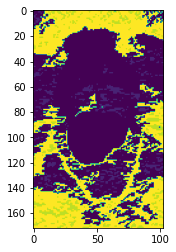

In [ ]:
timg = removeSmall(imgBound["b"] + 3, imgBound)
plt.imshow(timg)
plt.show()

contour

In [ ]:
def findEdge(z, imgBound, vLow = -93, vHigh = 26):
    def isNeighbour2(img, x, y, val2, imgBound):
        c = 0
        for ty in range(-1, 2):
            for tx in range(-1, 2):
                if x + tx >= 0 and y + ty >= 0 and x + tx < imgBound["x1"] - imgBound["x0"] and y + ty < imgBound["y1"] - imgBound["y0"] and img[y + ty][x + tx] == val2:
                    c = c + 1
        return True if c > 0 else False
    def getNeighbour(img, arr, x, y, val1, val2, imgBound):
        c = 0
        for ty in range(-1, 2):
            for tx in range(-1, 2):
                if x + tx >= 0 and y + ty >= 0 and x + tx < imgBound["x1"] - imgBound["x0"] and y + ty < imgBound["y1"] - imgBound["y0"] and img[y + ty][x + tx] == val1 and isNeighbour2(img, x + tx, y + ty, val2, imgBound):
                    arr.append((x + tx, y + ty))
                    c = c + 1
        return c
    def markEdge(img, x, y, imgBound, currentVal, markValue):
        arr = [(x, y)]
        c = 1
        while len(arr) > 0:
            f = arr.pop()
            img[f[1]][f[0]] = markValue
            c = c + getNeighbour(img, arr, f[0], f[1], currentVal, 10, imgBound)
        return img
    img = removeSmall(z, imgBound, vLow, vHigh, True)
    for y in range(imgBound["y1"] - imgBound["y0"]):
        for x in range(imgBound["x1"] - imgBound["x0"]):
            if img[y][x] == -10 and isNeighbour2(img, x, y, 10, imgBound):
                timg = markEdge(img, x, y, imgBound, -10, -20)
                # plt.imshow(timg)
                # plt.show()
                # reg = markSmallRegions(img, x, y, -10, -8, imgBound)
    return img

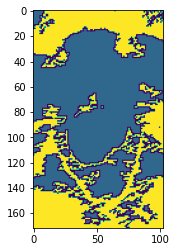

In [ ]:
timg = findEdge(imgBound["b"] + 3, imgBound, -93, 26)
plt.imshow(timg)
plt.show()

circle

In [ ]:
def drawImg(img, x0, y0, x1, y1):
    timgnp = np.array(img)
    out = Image.fromarray(np.uint8(timgnp * 255) , 'L')
    dr = ImageDraw.Draw(out)
    # dr.arc(xy=[(40, 60), (45, 65)], start=0, end=365, fill=128)
    dr.line((x0, y0, x1, y1), fill=128)
    # circleImage(timg, 40, 60, dr)
    imshow(np.asarray(out))
def circleImage(img, x, y, dr):
    arr = [ ]
    def rays(img, x0, y0, angle):
        x1 = x0
        y1 = y0
        angleRad = angle * math.pi / 180
        while img[y1][x1] != -20:
            if angle > 45 and angle < 135:
                x1 = x1 + 1
                y1 = int(y0 + (x1 - x0) * math.cos(angleRad) / math.sin(angleRad))
            if angle > 135 and angle < 225:
                y1 = y1 + 1
                x1 = int(x0 + (y1 - y0) * math.sin(angleRad) / math.cos(angleRad))
            if (angle > 0 and angle < 45) or (angle > 315 and angle < 360):
                y1 = y1 - 1
                x1 = int(x0 - (y0 - y1) * math.sin(angleRad) / math.cos(angleRad))
            if angle > 226 and angle < 314:
                x1 = x1 - 1
                y1 = int(y0 - (x0 - x1) * math.cos(angleRad) / math.sin(angleRad))
            # time.sleep(0.1)
            # drawImg(img, x0, y0, x1, y1)
        return (x1, y1)
    for deg in range(1, 44, 6):
        pos = rays(img, x, y, deg)
        if pos not in arr:
            arr.append(pos)
        dr.line((x, y, pos[0], pos[1]), fill=128)
    for deg in range(46, 135, 6):
        pos = rays(img, x, y, deg)
        if pos not in arr:
            arr.append(pos)
        dr.line((x, y, pos[0], pos[1]), fill=128)
    for deg in range(136, 224, 6):
        pos = rays(img, x, y, deg)
        if pos not in arr:
            arr.append(pos)
        dr.line((x, y, pos[0], pos[1]), fill=128)
    for deg in range(227, 314, 6):
        pos = rays(img, x, y, deg)
        if pos not in arr:
            arr.append(pos)
        dr.line((x, y, pos[0], pos[1]), fill=128)
    for deg in range(316, 359, 6):
        pos = rays(img, x, y, deg)
        if pos not in arr:
            arr.append(pos)
        dr.line((x, y, pos[0], pos[1]), fill=128)
    return arr
    # dr.line((x, y, pos[0], pos[1]), fill=128)

In [ ]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow

In [ ]:
def getConvex(points):
    def getLeftMost(points):
        l = 0
        for i in range(len(points)):
            if points[i][0] < points[l][0]:
                l = i
        return l
    def getArea(p1, p2, p3):
        return p2[0] * p3[1] - p3[0] * p2[1] - p1[0] * p3[1] + p3[0] * p1[1] + p1[0] * p2[1] - p2[0] * p1[1]
    a = getLeftMost(points)
    arr = [ a, (a + 1) % len(points) ]
    for p in range(a + 2, a + len(points)):
        if getArea(points[arr[-1]], points[arr[-2]], points[p % len(points)]) > 0:
            

In [ ]:
def printConvex(points, imgBound):
    out = Image.new("RGB", (imgBound["x1"] - imgBound["x0"], imgBound["y1"] - imgBound["y0"]), (255, 255, 255))
    dr = ImageDraw.Draw(out)
    p = points[0]
    for p2 in points[1 :]:
        dr.line((p[0], p[1], p2[0], p2[1]), fill=128)
        p = p2
    plt.imshow(np.asarray(out))
    plt.show()
printConvex(points, imgBound)

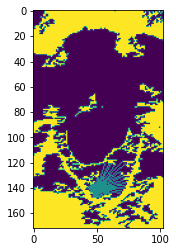

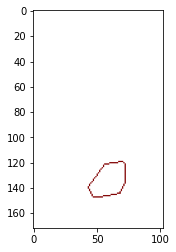

In [ ]:
out = Image.new("RGB", (150, 100), (255, 255, 255))
timg = findEdge(imgBound["b"] + 3, imgBound, -93, 26)
timgnp = np.array(timg)
out = Image.fromarray(np.uint8(timgnp * 255) , 'L')
dr = ImageDraw.Draw(out)
# dr.arc(xy=[(40, 60), (45, 65)], start=0, end=365, fill=128)
# dr.line((0, out.size[1], out.size[0], 0), fill=128)
points = circleImage(timg, 50, 140, dr)
plt.imshow(np.asarray(out))
plt.show()
hull = ConvexHull(np.array(points))
hull.vertices
printConvex(points2[hull.vertices], imgBound)
# drawImg(timg, 40, 60, 60, 70)

In [ ]:
points

In [ ]:
rng = np.random.default_rng()
points3 = rng.random((30, 2))   # 30 random points in 2-D
hull = ConvexHull(points2)
hull.vertices

array([33, 43, 39, 17, 12,  8, 26, 21, 34], dtype=int32)

In [ ]:
a = np.array([1, 3])
points2[a]

array([[ 48, 137],
       [ 56, 145]])

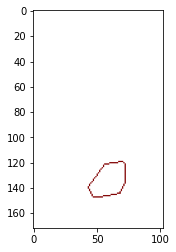

In [ ]:
printConvex(points2[hull.vertices], imgBound)